# Lefkovitch model of neurogenesis from different neuronal progenitors
Roberto Toro 11 February 2017

## 1. A turtle population example

Based on Don White's course at http://www.afrc.uamont.edu/whited/Stage-sructured%20matrix%20population%20modeling.pdf.

We model the growth of a population of individuals at different stages. The Lefkovitch matrix recapitulates the probability of each type of individual to stage in its same stage (diagonal elements), the probability to switch from one stage to the other (lower diagonal part), and their fertility, that is, the number of individuals they contribute to the newborn pool.

The following example models the growth of a population of Loggerhead Sea Turtles. The population contains individuals in different stages: newborns, small juveniles, large juveniles, subadults and adults.

In [198]:
%pylab inline
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt

# Compute eigenvalues and eigenvectors, plot the eigenvalues, and display the largest of them.
def eigen(M):
    evals,evecs=LA.eig(M.as_matrix())
    idx = evals.argsort()[::-1]   
    evals = evals[idx]
    evecs = evecs[:,idx]
    plt.bar(range(0,len(evals)),evals)
    print("Largest eigenvalue:",evals[0])

Populating the interactive namespace from numpy and matplotlib


In [199]:
# We follow a population consisting
# 45 newborns
# 18 small juveniles
# 56 large juveniles
# 4 subadults
# 1 adult
O=pd.DataFrame([[2000,500,300,300,1]]);

# Lefkovitch matrix
L=pd.DataFrame([
    [0    , 0    , 0    , 4.665, 61.896],
    [0.675, 0.703, 0    , 0    ,  0    ],
    [0    , 0.047, 0.657, 0    ,  0    ],
    [0    , 0    , 0.019, 0.682,  0    ],
    [0    , 0    , 0    , 0.061,  0.809]
])

('Largest eigenvalue:', (0.95154885548524781+0j))


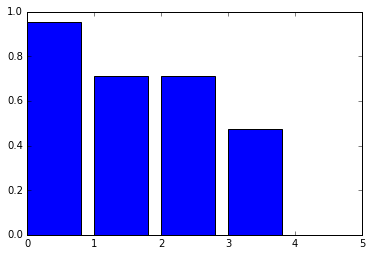

In [200]:
eigen(L)

In [201]:
# One step of population growth
O1=L.dot(O.transpose()).transpose()

print("After one round of population growth")

print("Population composition:")
print(O1.to_string())

print("Total number of individuals:"+O1.sum().to_string())

print("Growth:"+(O1.transpose().sum()/O.transpose().sum()).to_string())

After one round of population growth
Population composition:
          0       1      2      3       4
0  1461.396  1701.5  220.6  210.3  19.109
Total number of individuals:0    1461.396
1    1701.500
2     220.600
3     210.300
4      19.109
Growth:0    1.165077


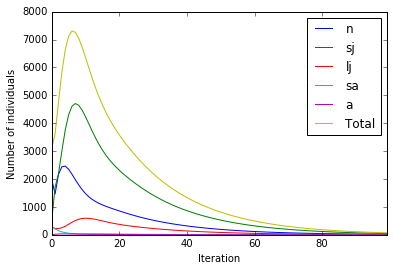

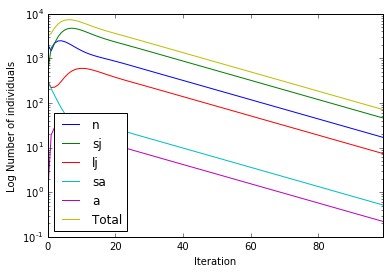

In [202]:
# N steps of population growth
N=100;
S=O.copy();
S.loc[0,5]=O.transpose().sum().loc[0];
for i in range(1,N):
    O1=L.dot(S.loc[i-1,0:4])
    S.loc[i]=O1;
    S.loc[i,5]=O1.sum()
S.columns=["n","sj","lj","sa","a","Total"]

# Plot
ax=S.plot()
ax.set_xlabel("Iteration");
ax.set_ylabel("Number of individuals");

ax=S.plot(logy=True)
ax.set_xlabel("Iteration");
ax.set_ylabel("Log Number of individuals");

Many loggerhead sea turtles are accidental captured in shrimp trawls and drown. One way to prevent this is to install escape hatches in shrimp trawl nets. These "Turtle exclusion devices" drastically reduce the mortality of larger turtles, for example, from $P_{5,5}=0.809$ to $P_{5,5}=0.876$.

//anaconda/lib/python2.7/site-packages/matplotlib/patches.py:642: ComplexWarning: Casting complex values to real discards the imaginary part
  self._y = float(xy[1])


('Largest eigenvalue:', (1.0341556068639377+0j))


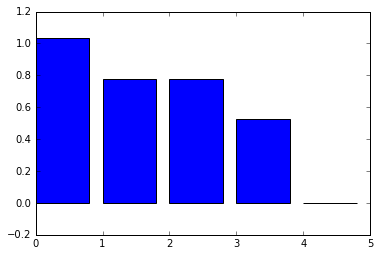

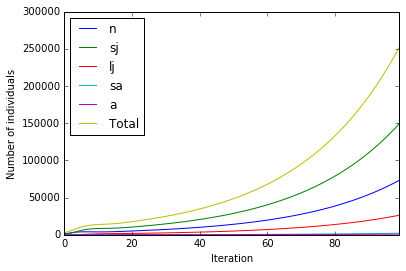

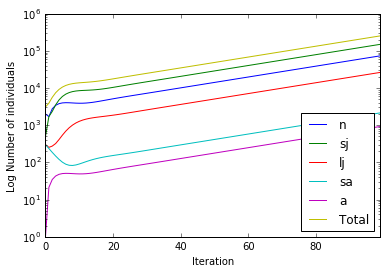

In [203]:
# Lefkovitch matrix with "Turtle exclusion devices"
L=pd.DataFrame([
    [0    , 0    , 0    , 5.448, 69.390],
    [0.675, 0.703, 0    , 0    ,  0    ],
    [0    , 0.047, 0.767, 0    ,  0    ],
    [0    , 0    , 0.022, 0.765,  0    ],
    [0    , 0    , 0    , 0.068,  0.876]
])
eigen(L)

# N steps of population growth
N=100;
S=O.copy();
S.loc[0,5]=O.transpose().sum().loc[0];
for i in range(1,N):
    O1=L.dot(S.loc[i-1,0:4])
    S.loc[i]=O1;
    S.loc[i,5]=O1.sum()
S.columns=["n","sj","lj","sa","a","Total"]

# Plot
ax=S.plot()
ax.set_xlabel("Iteration");
ax.set_ylabel("Number of individuals");

ax=S.plot(logy=True)
ax.set_xlabel("Iteration");
ax.set_ylabel("Log Number of individuals");

# 2. Neurogenesis

I am trying to reproduce the results in E. Lewitus (2014) paper "Adaptive threshold...". Here, the population is composed of different types of cells, some pluripotent cells dividing symmetrically, some neuronal progenitors producing glia and neurones. Depenging on the original abundance of cells, the length of the cell cycle, and the different types of intermediate cells produced, the final neuronal counts will differ.